In [2]:
import pandas as pd
import sys
sys.path.append('../')
from urllib.parse import urlparse
from src.loader import load_data
# Specify the path to the csv files
article_path = '../data/data.csv'
traffic_path = '../data/traffic.csv'
rating_path = '../data/rating.csv'

# Load the JSON file into a DataFrame
df = load_data(article_path)
rating_df = load_data(rating_path)
traffic_df = load_data(traffic_path)
df['Domain'] = df['url'].apply(lambda x: urlparse(x).netloc)
# Display the DataFrame
merged_df = pd.merge(df, traffic_df, left_on='Domain', right_on='Domain', how='left')
# Group by 'source_name' and sum the traffic metrics (e.g., 'RefIPs')
most_visited_news_sites = merged_df.groupby('source_name')['RefIPs'].sum().sort_values(ascending=False)
# Convert the Series to a DataFrame
most_visited_news_sites_df = most_visited_news_sites.reset_index()
# Rename the columns for clarity
most_visited_news_sites_df.columns = ['source_name', 'RefIPs']
# Print the top 10 news sites with the highest traffic
print(most_visited_news_sites_df.head(10))


                   source_name       RefIPs
0           The Times of India  135680860.0
1                         Time   80895760.0
2                     Phys.Org   62844240.0
3           The Indian Express   47347784.0
4                     Deadline   40268070.0
5                  Gizmodo.com   26419200.0
6                New York Post   25782390.0
7                  Boing Boing   20997864.0
8                    The Punch   19423794.0
9  AllAfrica - Top Africa News   18500757.0


In [35]:
# Sentiment

# Group data by 'source_name' and 'title_sentiment'
grouped_data = rating_df.groupby(['source_name', 'title_sentiment']).size()

# Calculate mean for each
mean_statistics = grouped_data.groupby(['source_name', 'title_sentiment']).mean()

# Get the top 10 websites with mean for positive
top_positive_websites = mean_statistics.loc[(slice(None), 'Positive')].nlargest(10)

# Get the top 10 websites with mean for neutral
top_neutral_websites = mean_statistics.loc[(slice(None), 'Neutral')].nlargest(10)

# Get the top 10 websites with mean for negative
top_negative_websites = mean_statistics.loc[(slice(None), 'Negative')].nlargest(10)

# Print the top 10 websites based on mean for positive
print("Top 10 Mean for Positive")
print(top_positive_websites)
print()

# Print the top 10 websites based on mean for neutral sentiment
print("Top 10 Mean for Neutral")
print(top_neutral_websites)
print()

# Print the top 10 websites based on mean for negative sentiment
print("Top 10 Mean Negative")
print(top_negative_websites)

Top 10 Mean for Positive
source_name
The Times of India    1145.0
ETF Daily News         992.0
GlobeNewswire          905.0
Forbes                 635.0
Digital Trends         406.0
Android Central        272.0
Business Insider       237.0
Boing Boing            170.0
Marketscreener.com     153.0
Phys.Org               143.0
dtype: float64

Top 10 Mean for Neutral
source_name
ETF Daily News        15194.0
The Times of India     5149.0
GlobeNewswire          4491.0
Globalsecurity.org     2255.0
Forbes                 1933.0
The Punch              1229.0
ABC News               1193.0
BBC News               1185.0
Marketscreener.com     1167.0
Al Jazeera English      927.0
dtype: float64

Top 10 Mean Negative
source_name
The Times of India              1210.0
Business Insider                 890.0
BBC News                         854.0
Globalsecurity.org               747.0
ABC News                         726.0
Al Jazeera English               706.0
ETF Daily News                   560.0

In [26]:
print(traffic_df.columns)


Index(['GlobalRank', 'TldRank', 'Domain', 'TLD', 'RefSubNets', 'RefIPs',
       'IDN_Domain', 'IDN_TLD', 'PrevGlobalRank', 'PrevTldRank',
       'PrevRefSubNets', 'PrevRefIPs'],
      dtype='object')


In [6]:
column = df.columns
column

Index(['article_id', 'source_id', 'source_name', 'author', 'title',
       'description', 'url', 'url_to_image', 'published_at', 'content',
       'category', 'full_content'],
      dtype='object')

In [14]:
top_10_websites = df['source_name'].value_counts().head(10)
print(top_10_websites)

source_name
ETF Daily News        16631
The Times of India     7629
GlobeNewswire          5485
Forbes                 4423
Biztoc.com             3968
BBC News               3342
Globalsecurity.org     3093
Business Insider       2746
ABC News               2188
Marketscreener.com     1948
Name: count, dtype: int64


In [15]:
least_10_websites = df['source_name'].value_counts(ascending=True).head(10)
print(least_10_websites)

source_name
Omnigroup.com            1
Fresno Bee               1
Cs.ru.nl                 1
Labnol.org               1
Theedgemalaysia.com      1
Schwab.com               1
Amd.com                  1
Bubbyandbean.com         1
Thriftydecorchick.com    1
Phpclasses.org           1
Name: count, dtype: int64


In [9]:
top = df.head

<bound method NDFrame.head of         article_id source_id                   source_name  \
0            89541       NaN  International Business Times   
1            89542       NaN                    Prtimes.jp   
2            89543       NaN                      VOA News   
3            89545       NaN            The Indian Express   
4            89547       NaN           The Times of Israel   
...            ...       ...                           ...   
105370      781108       NaN            The Indian Express   
105371      781129       NaN                        Forbes   
105372      781235       NaN                           NPR   
105373      781240       NaN                        Forbes   
105374      781308       NaN                        Forbes   

                                                   author  \
0                                          Paavan MATHEMA   
1                                                     NaN   
2              webdesk@voanews.com (Agence

In [18]:
traffic_df

,GlobalRank,TldRank,Domain,TLD,RefSubNets,RefIPs,IDN_Domain,IDN_TLD,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs
0,1,1,google.com,com,471274,2151358,google.com,com,1,1,471248,2147402
1,2,2,facebook.com,com,465424,2250631,facebook.com,com,2,2,465297,2247135
2,3,3,youtube.com,com,420579,1852995,youtube.com,com,3,3,420483,1848940
3,4,4,twitter.com,com,404985,1757127,twitter.com,com,4,4,404998,1753939
4,5,5,instagram.com,com,364746,1598085,instagram.com,com,5,5,364618,1594892
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,485324,kireie.com,com,222,280,kireie.com,com,-1,-1,-1,-1
999996,999997,485325,mt-lock.com,com,222,280,mt-lock.com,com,952633,461429,232,284
999997,999998,485326,pinkwater.com,com,222,280,pinkwater.com,com,-1,-1,-1,-1
999998,999999,485327,soderhomes.com,com,222,280,soderhomes.com,com,-1,-1,-1,-1


In [19]:
traffic_column = traffic_df.columns
traffic_column

Index(['GlobalRank', 'TldRank', 'Domain', 'TLD', 'RefSubNets', 'RefIPs',
       'IDN_Domain', 'IDN_TLD', 'PrevGlobalRank', 'PrevTldRank',
       'PrevRefSubNets', 'PrevRefIPs'],
      dtype='object')

In [20]:
df_sorted_by_unique_visitors = traffic_df.sort_values(by='RefIPs', ascending=False)

# Print the website with the highest number of unique visitors
print(df_sorted_by_unique_visitors[['Domain', 'RefIPs']].head(10))

                  Domain   RefIPs
1           facebook.com  2250631
0             google.com  2151358
2            youtube.com  1852995
3            twitter.com  1757127
4          instagram.com  1598085
5           linkedin.com  1319082
8   googletagmanager.com   863843
10         wordpress.org   835948
9          wikipedia.org   831384
6              apple.com   804726


/tmp/ipykernel_17751/1049138793.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  small_data['title'].fillna('', inplace=True)
/tmp/ipykernel_17751/1049138793.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Document 1 similarity score: 0.7480831516732054
Document 2 similarity score: 0.0
Document 3 similarity score: 0.7480831516732054
Document 4 similarity score: 0.0
Document 5 similarity score: 0.04365415130107176
Document 6 similarity score: 0.0
Document 7 similarity score: 0.0
Document 8 similarity score: 0.16129182599740832
Document 9 similarity score: 0.07365739582534765
Document 10 similarity score: 0.07127057996249246
Document 11 similarity score: 0.08144678425521881
Document 12 similarity score: 0.16511248313136523
Document 13 similarity score: 0.0
Document 14 similarity score: 0.0
Document 15 similarity score: 0.0
Document 16 similarity score: 0.2797194474522454
Document 17 similarity score: 0.0
Document 18 similarity score: 0.04440332536121685
Document 19 similarity score: 0.029465138444562004
Document 20 similarity score: 0.0
Document 21 similarity score: 0.04520857615919151
Document 22 similarity score: 0.05602209404337483
Document 23 similarity score: 0.0
Document 24 similarit

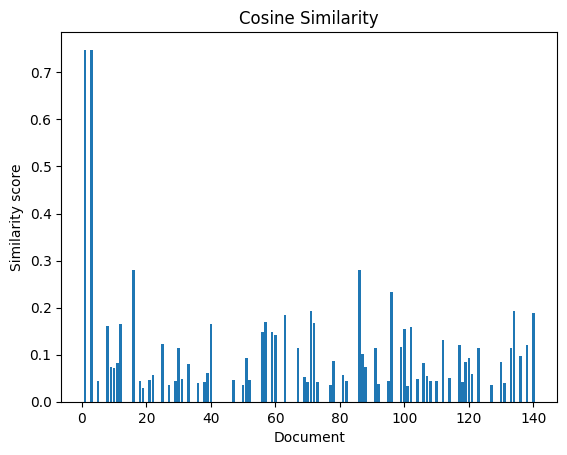

In [2]:
import sys
sys.path.append('../')
from src.loader import load_data
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

small_data_path = '../data/small_data.csv'
small_data = load_data(small_data_path)

vectorizer = TfidfVectorizer()

small_data['title'].fillna('', inplace=True)
small_data['content'].fillna('', inplace=True)

title_tfidf = vectorizer.fit_transform(small_data['title'])
content_tfidf = vectorizer.transform(small_data['content'])

similarity_scores = cosine_similarity(title_tfidf, content_tfidf)

for i, score in enumerate(similarity_scores):
    print(f"Document {i+1} Similarity score: {score[0]}")

x = range(1, len(similarity_scores) + 1)
y = [score[0] for score in similarity_scores]

plt.bar(x, y)
plt.xlabel('Document')
plt.ylabel('Similarity score')
plt.title('Cosine Similarity')
plt.show()

In [6]:
import nltk
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')
nltk.download('stopwords')

small_data['text'] = small_data['title'] + ' ' + small_data['content']

stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha() and token not in stopwords]
    tokens = [stemmer.stem(token) for token in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text
small_data['preprocessed_text'] = small_data['text'].apply(preprocess_text)
preprocessed_text_data = small_data['preprocessed_text']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(preprocessed_text_data)
feature_names = vectorizer.get_feature_names_out()
n_topics = 5 
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

top_words_per_topic = []
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-6:-1]]
    top_words_per_topic.append(top_words)

categories = ['Sports', 'Politics', 'Technology', 'Entertainment', 'Health']

for topic_idx, top_words in enumerate(top_words_per_topic):
    category = categories[topic_idx]
    print(f'Topic {topic_idx + 1}: {", ".join(top_words)} (Category: {category})')

[nltk_data] Downloading package punkt to /home/melaku/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/melaku/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 1: char, india, nepal, flood, miss (Category: Sports)
Topic 2: char, attack, hama, nepal, miss (Category: Politics)
Topic 3: char, world, nepal, israel, kill (Category: Technology)
Topic 4: char, india, court, nepal, activ (Category: Entertainment)
Topic 5: char, india, new, delhi, peopl (Category: Health)
